In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def build_transpose_matrix(xn, order):
    A = np.empty((0, len(xn)))
    for i in range(order + 1):
        A = np.vstack((xn ** i, A))
    
    return A.T

In [3]:
solid_coef = [0.1, -0.8, -1.5, 5.4]
poly_order = 3
data_range = np.array([-6, 12])
data_num = 100
noise_std = 1.0

In [4]:
x = np.random.uniform(data_range[0], data_range[1], size = data_num)
y = build_transpose_matrix(x, len(solid_coef) - 1) @ solid_coef

In [5]:
xn = x + np.random.normal(scale = noise_std, size = x.shape)
yn = y + np.random.normal(scale = noise_std, size = y.shape)

In [7]:
A = build_transpose_matrix(xn, poly_order)
b = yn

coef = np.linalg.pinv(A) @ b

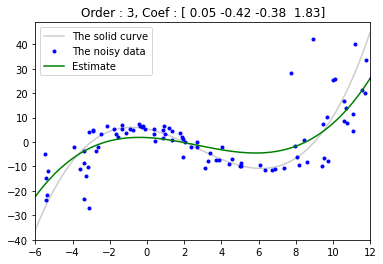

In [10]:
plt.title(f'Order : {poly_order}, Coef : ' + np.array2string(coef, precision = 2, suppress_small = True))
xc = np.linspace(*data_range, 100)
plt.plot(xc, np.matmul(build_transpose_matrix(xc, len(solid_coef) - 1), solid_coef), 'k-', label = 'The solid curve', alpha = 0.2)
plt.plot(xn, yn, 'b.', label = 'The noisy data')
plt.plot(xc, build_transpose_matrix(xc, poly_order) @ coef, 'g-', label = 'Estimate')
plt.xlim(data_range)
plt.legend()
plt.show()

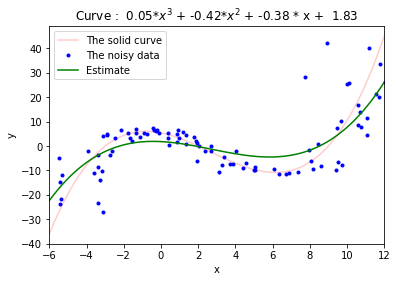

In [16]:
plt.title(f'Curve : {coef[0] : .2f}$ * x^3$ + {coef[1] : .2f}$ * x^2$ + {coef[2] : .2f} * x + {coef[3] : .2f}')
xc = np.linspace(*data_range, 100)
plt.plot(xc, np.matmul(build_transpose_matrix(xc, len(solid_coef) - 1), solid_coef), 'r-', label = 'The solid curve', alpha = 0.2)
plt.plot(xn, yn, 'b.', label = 'The noisy data')
plt.plot(xc, build_transpose_matrix(xc, poly_order) @ coef, 'g-', label = 'Estimate')
plt.xlim(data_range)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()